version 1.1

# Data Analysis using Pandas and Matplotlib

A good source of data sets https://data.gov.ie/ <br>
Met Eireann Historical data available:<br>

https://www.met.ie/climate/available-data/long-term-data-sets

In this lesson we are going to import historical data from Met eireann and analyise it using Panda's and plot the results using Matplotlib.



In [11]:
# import the list of stations
import pandas as pd
# Plot Library
from matplotlib import pyplot as plt
import numpy as np

## Import the CSV and Print Dataframe

In [12]:
# No need for a directory path if in the same directory
df = pd.read_csv("/Users/morgan/Documents/Courses/Python/MyModules/DublinAirportClean.csv")

In [3]:
print(df)

     Year    Jan   Feb    Mar   Apr    May    Jun    Jul    Aug    Sep    Oct  \
0    1850   75.8  47.8   18.5  97.5   58.6   43.6   66.0   41.2   54.2   40.4   
1    1851  112.0  26.2   63.1  44.4   29.3   78.5   70.5   55.2   24.6   88.0   
2    1852   80.3  70.5   18.2  30.4   93.0  162.2   56.0   97.2   78.2   78.7   
3    1853   74.7  52.3   71.7  44.8   22.7   58.9   49.9   81.3   35.5  123.7   
4    1854  101.1  15.7   18.4  15.7   69.3   93.6   58.1   29.1   33.1   45.9   
..    ...    ...   ...    ...   ...    ...    ...    ...    ...    ...    ...   
156  2006   16.0  38.0   70.0  41.0  117.0   27.0   18.0   58.0   85.0  107.0   
157  2007   40.0  78.0   39.0  15.0   35.0  126.0  127.0   96.0   39.0   16.0   
158  2008   97.0  15.0  102.0  28.0   33.0   76.0  111.0  192.4  114.0   93.0   
159  2009   62.0  56.0   26.0  71.0   76.0   64.0  165.0   70.0   24.0   63.0   
160  2010   45.0  37.0   55.0  27.0   38.0   50.0   79.0   48.0  104.0   31.0   

       Nov   Dec  
0     60

In [4]:
df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1850,75.8,47.8,18.5,97.5,58.6,43.6,66.0,41.2,54.2,40.4,60.0,81.1
1,1851,112.0,26.2,63.1,44.4,29.3,78.5,70.5,55.2,24.6,88.0,27.5,23.5
2,1852,80.3,70.5,18.2,30.4,93.0,162.2,56.0,97.2,78.2,78.7,156.1,97.2
3,1853,74.7,52.3,71.7,44.8,22.7,58.9,49.9,81.3,35.5,123.7,40.3,52.3
4,1854,101.1,15.7,18.4,15.7,69.3,93.6,58.1,29.1,33.1,45.9,76.8,51.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2006,16.0,38.0,70.0,41.0,117.0,27.0,18.0,58.0,85.0,107.0,69.0,95.0
157,2007,40.0,78.0,39.0,15.0,35.0,126.0,127.0,96.0,39.0,16.0,54.0,64.0
158,2008,97.0,15.0,102.0,28.0,33.0,76.0,111.0,192.4,114.0,93.0,45.0,39.0
159,2009,62.0,56.0,26.0,71.0,76.0,64.0,165.0,70.0,24.0,63.0,171.0,70.0


## Changing the Index

In [5]:
# Make the Year the index value permanently
df.set_index('Year', inplace = True)

In [13]:
df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1850,75.8,47.8,18.5,97.5,58.6,43.6,66.0,41.2,54.2,40.4,60.0,81.1
1,1851,112.0,26.2,63.1,44.4,29.3,78.5,70.5,55.2,24.6,88.0,27.5,23.5
2,1852,80.3,70.5,18.2,30.4,93.0,162.2,56.0,97.2,78.2,78.7,156.1,97.2
3,1853,74.7,52.3,71.7,44.8,22.7,58.9,49.9,81.3,35.5,123.7,40.3,52.3
4,1854,101.1,15.7,18.4,15.7,69.3,93.6,58.1,29.1,33.1,45.9,76.8,51.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2006,16.0,38.0,70.0,41.0,117.0,27.0,18.0,58.0,85.0,107.0,69.0,95.0
157,2007,40.0,78.0,39.0,15.0,35.0,126.0,127.0,96.0,39.0,16.0,54.0,64.0
158,2008,97.0,15.0,102.0,28.0,33.0,76.0,111.0,192.4,114.0,93.0,45.0,39.0
159,2009,62.0,56.0,26.0,71.0,76.0,64.0,165.0,70.0,24.0,63.0,171.0,70.0


In [14]:
# Output the year values
df['Year']

0      1850
1      1851
2      1852
3      1853
4      1854
       ... 
156    2006
157    2007
158    2008
159    2009
160    2010
Name: Year, Length: 161, dtype: int64

In [16]:
df.index
df['Jan']
#rain_y = df.loc['Aug']

0       75.8
1      112.0
2       80.3
3       74.7
4      101.1
       ...  
156     16.0
157     40.0
158     97.0
159     62.0
160     45.0
Name: Jan, Length: 161, dtype: float64

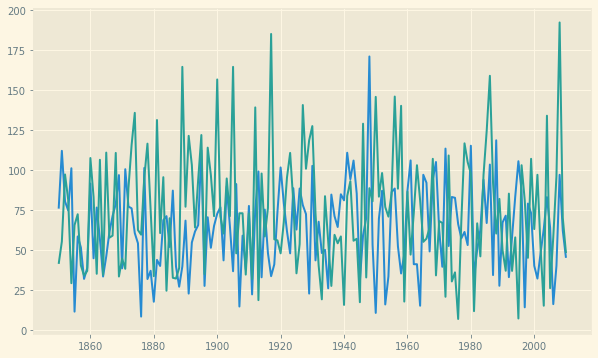

In [17]:
#Simple Plot
plt.rcParams['figure.figsize'] = [10, 6]
plt.style.use('Solarize_Light2')
plt.plot(df['Year'],df.Jan)
plt.plot(df['Year'],df.Aug)

## Create a filter
Our objective is to print out a bar chart that prints out the rain values for January, August and November at five or ten year intervals.

In [25]:
# Create a list with a fewer number of years
nums = range(1850,2010,10)
my_list = []
for n in nums:
    my_list.append(n)
print(my_list)

[1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000]


In [26]:
# Filter out the data for those years
filt = df['Year'].isin(my_list)
print(filt.head(30))

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
Name: Year, dtype: bool


In [27]:
x_values = df.loc[filt, ['Year']]
print(x_values)

     Year
0    1850
10   1860
20   1870
30   1880
40   1890
50   1900
60   1910
70   1920
80   1930
90   1940
100  1950
110  1960
120  1970
130  1980
140  1990
150  2000


## Create a new dataframe with the information that we want


In [28]:
# Create a new DataFrame with the data we want
newDF = df.loc[filt, ['Year','Jan', 'Aug', 'Nov']]
print(newDF)

     Year    Jan    Aug    Nov
0    1850   75.8   41.2   60.0
10   1860   91.5  107.5   70.5
20   1870   38.4   44.5   31.2
30   1880   17.5   33.5  103.6
40   1890   68.3   77.0  101.3
50   1900   72.6  156.7  132.1
60   1910   77.5   72.9   78.2
70   1920  101.6   47.8   65.8
80   1930  102.6  127.5   69.1
90   1940   81.0   15.5   92.2
100  1950   10.5  145.8   56.6
110  1960   87.0   86.4  102.8
120  1970   63.0   68.0  128.0
130  1980  115.2   97.8   41.4
140  1990   67.1   49.8   64.0
150  2000   40.0   63.0  141.0


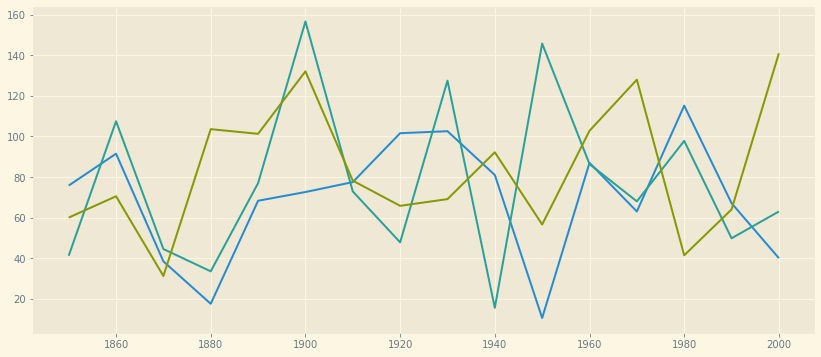

In [29]:
# Print our new plot
plt.plot(newDF['Year'],newDF.Jan)
plt.plot(newDF['Year'],newDF.Aug)
plt.plot(newDF['Year'],newDF.Nov)

<BarContainer object of 16 artists>

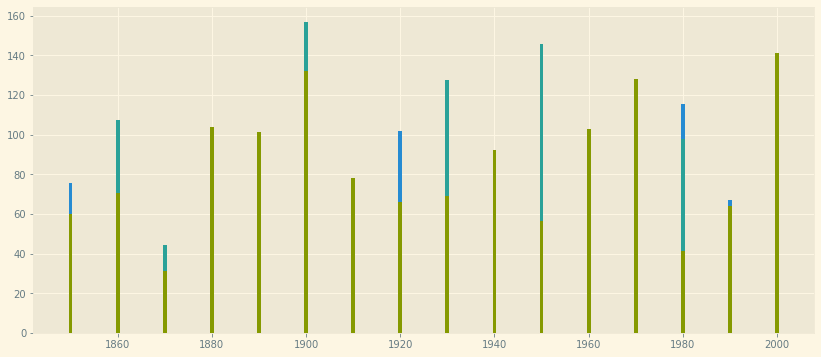

In [30]:
# Change to a bar plot
plt.bar(newDF['Year'],newDF.Jan)
plt.bar(newDF['Year'],newDF.Aug)
plt.bar(newDF['Year'],newDF.Nov)





## Hmmm...
Let us try to sort out this mess...

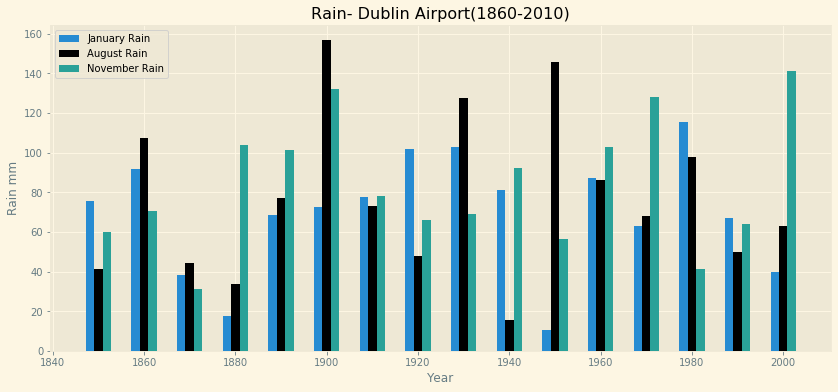

In [32]:
plt.style.use('Solarize_Light2')
plt.rcParams['figure.figsize'] = [14, 6]
width = 1.85
plt.bar(newDF['Year'] - width, newDF.Jan, width = width, label = 'January Rain')
plt.bar(newDF['Year'] ,  newDF.Aug, width = width, color = 'k', label = 'August Rain')
plt.bar(newDF['Year'] + width, newDF.Nov, width = width, label = 'November Rain')


plt.title('Rain- Dublin Airport(1860-2010)')
plt.xlabel('Year')
plt.ylabel('Rain mm')
plt.grid(True)
plt.legend()

# Statistical Analysis

## Simple Stats

In [36]:
# Mean and Median
print(df['Jan'].mean())

df[year",'Jan'].max()

63.493788819875775


KeyError: ('year', 'Jan')

In [ ]:
# Statistic on all of the dataframe
df.mean()

In [37]:
# General Statistics
df.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,1930.000000,63.493789,48.740994,51.455901,49.272050,56.065839,55.772050,64.234161,74.695031,61.985714,72.820497,68.547205,68.464596
std,46.620811,27.618329,27.089787,26.216385,24.040248,29.360976,32.226552,33.171206,37.701832,34.297676,38.367021,34.227104,32.205812
min,1850.000000,8.200000,1.500000,5.000000,1.500000,3.600000,2.500000,9.200000,6.700000,2.700000,11.000000,9.700000,13.700000
25%,1890.000000,41.000000,28.000000,31.000000,32.500000,34.400000,32.400000,40.000000,47.000000,34.800000,42.500000,45.000000,45.600000
50%,1930.000000,63.000000,46.000000,50.300000,45.000000,52.300000,49.500000,57.500000,71.100000,58.700000,69.300000,60.600000,60.000000
75%,1970.000000,83.100000,62.000000,67.300000,62.000000,70.900000,73.900000,82.800000,97.200000,81.300000,93.000000,90.700000,88.900000
max,2010.000000,171.100000,127.500000,148.600000,147.000000,149.900000,168.500000,165.000000,192.400000,170.900000,200.900000,187.000000,217.000000


## Grouping Data
When grouping data it is a three phase process. Split, apply a function, recombine.

In [38]:
# load a new set of data for Killarney
kill_df = pd.read_csv("/Users/morgan/Documents/Courses/Python/MyModules/Killarney_1881-1933.csv")
kill_df

,Year,Month,Day,Max (F),Min (F),Max C),Min (C)
0,1881,5,1,56.8,43.0,13.8,6.1
1,1881,5,2,55.8,38.1,13.2,3.4
2,1881,5,3,59.0,37.0,15.0,2.8
3,1881,5,4,57.7,45.7,14.3,7.6
4,1881,5,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
18898,1933,1,27,NaN,24.0,NaN,-4.4
18899,1933,1,28,NaN,29.0,NaN,-1.7
18900,1933,1,29,NaN,31.0,NaN,-0.6
18901,1933,1,30,NaN,33.0,NaN,0.6


In [39]:
kill_df.shape

(18903, 7)

In [40]:
year_group = kill_df.groupby(['Year'])

In [41]:
year_group.get_group(1933)

,Year,Month,Day,Max (F),Min (F),Max C),Min (C)
18872,1933,1,1,NaN,48.0,NaN,8.9
18873,1933,1,2,NaN,51.0,NaN,10.6
18874,1933,1,3,NaN,43.0,NaN,6.1
18875,1933,1,4,NaN,44.0,NaN,6.7
18876,1933,1,5,NaN,39.0,NaN,3.9
18877,1933,1,6,NaN,43.0,NaN,6.1
18878,1933,1,7,NaN,52.0,NaN,11.1
18879,1933,1,8,NaN,52.0,NaN,11.1
18880,1933,1,9,NaN,46.0,NaN,7.8
18881,1933,1,10,NaN,47.0,NaN,8.3


In [42]:
# Same as filter 
filt = kill_df['Year']== 1933
kill_df.loc[filt]

,Year,Month,Day,Max (F),Min (F),Max C),Min (C)
18872,1933,1,1,NaN,48.0,NaN,8.9
18873,1933,1,2,NaN,51.0,NaN,10.6
18874,1933,1,3,NaN,43.0,NaN,6.1
18875,1933,1,4,NaN,44.0,NaN,6.7
18876,1933,1,5,NaN,39.0,NaN,3.9
18877,1933,1,6,NaN,43.0,NaN,6.1
18878,1933,1,7,NaN,52.0,NaN,11.1
18879,1933,1,8,NaN,52.0,NaN,11.1
18880,1933,1,9,NaN,46.0,NaN,7.8
18881,1933,1,10,NaN,47.0,NaN,8.3


In [ ]:
kill_df.loc[filt,['Min (C)']].min()

In [43]:
#Get the lowest temp for each year from 1881
year_group['Min (C)'].min()

Year
1881    -7.4
1882   -11.4
1883    -7.3
1884    -6.6
1885    -7.1
1886    -9.3
1887    -7.8
1888    -8.4
1889    -5.3
1890    -8.3
1891    -8.4
1892    -9.7
1893    -6.2
1894   -10.4
1895    -9.7
1896    -7.2
1897    -7.2
1898    -5.8
1899     NaN
1900     NaN
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905     NaN
1906     NaN
1907     NaN
1908     NaN
1909     NaN
1910     NaN
1911     NaN
1912     NaN
1913     NaN
1914     NaN
1915     NaN
1916     NaN
1917     NaN
1918     NaN
1919     NaN
1920    -6.1
1921    -3.6
1922    -3.9
1923    -5.0
1924    -5.0
1925    -4.4
1926    -5.0
1927    -3.9
1928    -4.4
1929    -5.8
1930    -3.9
1931    -5.6
1932    -3.9
1933    -5.6
Name: Min (C), dtype: float64

## SAQ 1
Go to Met Eireann and download a set of data which is suitable for grouping. Import the csv file and group the data.

# Widgets

In [ ]:
# The widgets library
import ipywidgets as widgets
x=90
widgets.IntSlider(x)

In [11]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('Solarize_Light2')
plt.rcParams['figure.figsize'] = [14, 7]

def f(m, c):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + c)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), c=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

# Appendix

## Clunky Graph Solution

In [ ]:
jan_rain = df.loc[filt, ['Jan']]
aug_rain = df.loc[filt, ['Aug']]
nov_rain = df.loc[filt, ['Nov']]

In [ ]:
year = df.loc[filt, ['Year']]

In [ ]:
list_jan = jan_rain['Jan'].to_list()
list_aug = aug_rain['Aug'].to_list()
list_nov = nov_rain['Nov'].to_list()

data= {'Year': my_list,
      'Jan_rain': list_jan,
      'Aug_rain': list_aug,
      'Nov_rain': list_nov
      }
df_new = pd.DataFrame(data)
df_new
#print(jan_rain['Jan'].to_list())
# print(jan_rain)

In [ ]:
print(nov_rain)

In [ ]:
# Set the size of the plot
plt.rcParams['figure.figsize'] = [10, 6]

plt.bar(df_new['Year'],df_new.Jan_rain)
plt.bar(df_new['Year'],df_new.Aug_rain)




In [ ]:
# Set the size of the plot
plt.rcParams['figure.figsize'] = [14, 6]

#Get a list of the years that we want
nums = range(1860,2010,10)
years = []
for n in nums:
    years.append(n)   

    # Use the values in years to filter our datframe    
filt = df['Year'].isin(years)

year = df.loc[filt, ['Year']]
# Get the values for the relevant months as a series
jan_rain = df.loc[filt, ['Jan']]
aug_rain = df.loc[filt, ['Aug']]
nov_rain = df.loc[filt, ['Nov']]

#Convert series to a list
list_jan = jan_rain['Jan'].to_list()
list_aug = aug_rain['Aug'].to_list()
list_nov = nov_rain['Nov'].to_list()

data= {'Year': years,
      'Jan_rain': list_jan,
      'Aug_rain': list_aug,
      'Nov_rain': list_nov
      }
df_new = pd.DataFrame(data)
print(df_new)

# x_indices = np.arange(len(month))
width = 1.85

In [ ]:
plt.style.use('Solarize_Light2')

plt.bar(df_new['Year'] - width, df_new.Jan_rain, width = width, label = 'January Rain')
plt.bar(df_new['Year'] ,  df_new.Aug_rain, width = width, color = 'k', label = 'August Rain')
plt.bar(df_new['Year'] + width, df_new.Nov_rain, width = width, label = 'November Rain')


plt.title('Rain- Dublin Airport(1860-2010)')
plt.xlabel('Year')
plt.ylabel('Rain mm')
plt.grid(True)
plt.legend()